In [1]:
from helper import *

data_pathway = './data/ratings.csv'

data = pd.read_csv(data_pathway)



In [2]:
processed_data = preprocess_data(data)
processed_data

,Key,Date,Name,Year,Letterboxd URI,Rating,Genres,Runtime,Revenue,Budget,...,Mystery,NA,Romance,Science Fiction,TV Movie,Thriller,War,War & Politics,Western,<NA>
0,0,2020-09-11,Knives Out,2019,https://boxd.it/jWEA,4.0,"[Comedy, Crime, Mystery]",131,312897920,40000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1,2020-09-11,Inception,2010,https://boxd.it/1skk,4.0,"[Action, Science Fiction, Adventure]",148,825532764,160000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2,2020-09-11,Spider-Man: Into the Spider-Verse,2018,https://boxd.it/azpY,3.5,"[Action, Adventure, Animation, Science Fiction]",117,375464627,90000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
3,3,2020-09-11,Avengers: Infinity War,2018,https://boxd.it/9vEe,3.5,"[Adventure, Action, Science Fiction]",149,2052415039,300000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
4,4,2020-09-11,Guardians of the Galaxy,2014,https://boxd.it/3VH2,3.5,"[Action, Science Fiction, Adventure]",121,772776600,170000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,385,2023-07-18,Joy Ride,2023,https://boxd.it/wEeK,3.0,[Comedy],95,11000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
386,386,2023-07-20,The Story of Stuff,2007,https://boxd.it/4JBI,4.5,"[Animation, Documentary]",22,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
387,387,2023-07-22,Barbie,2023,https://boxd.it/bCLK,3.5,"[Comedy, Adventure, Fantasy]",114,1202507382,145000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
388,388,2023-07-23,My Neighbor Totoro,1988,https://boxd.it/20eA,3.0,"[Fantasy, Animation, Family]",86,41000000,3700000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [3]:
processed_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Key              390 non-null    object 
 1   Date             390 non-null    object 
 2   Name             390 non-null    object 
 3   Year             390 non-null    int32  
 4   Letterboxd URI   390 non-null    object 
 5   Rating           390 non-null    float64
 6   Genres           349 non-null    object 
 7   Runtime          348 non-null    object 
 8   Revenue          348 non-null    object 
 9   Budget           348 non-null    object 
 10  Vote Average     349 non-null    object 
 11  Vote Count       349 non-null    object 
 12  Popularity       349 non-null    object 
 13  Action           390 non-null    float64
 14  Adventure        390 non-null    float64
 15  Animation        390 non-null    float64
 16  Comedy           390 non-null    float64
 17  Crime           

In [21]:
# Verify ordinality assumption
def verify_ordinality(data):
    response_categories = np.unique(data["Rating"].dropna())
    print(response_categories)
    for response in response_categories:
        print(np.mean(data["Runtime"].loc[data["Rating"] == response]))

    relevant_columns = ["Rating", "Runtime", "Revenue", "Budget", "Popularity"]
    relevant_data = data[relevant_columns]

    # Use boxplot to look at data grouped by different ratings
    relevant_data.boxplot(column = ["Runtime"], by = "Rating")
    relevant_data.boxplot(column = ["Revenue"], by = "Rating")
    relevant_data.boxplot(column = ["Popularity"], by = "Rating")
    relevant_data.boxplot(column = ["Budget"], by = "Rating")

    

# Before performing regression statistics on ratings, perform EDA on independent variables
# Look at number of missing entries
# Do we need to transform any of the independent variables?

# Need to do some feature engineering for Genres variable?
# One-hot encode for each genre

# Could include some topic modeling features?

# What predictive model are we going to be using?
# We need to verify assumptions of the model!
# Some options: linear regression, decision trees

# Regression statistics on ratings
# Dependent variable: ratings
# Independent variables: Runtime, Revenue, Budget, Popularity, Genres



[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
114.33333333333333
104.0
103.0
104.47826086956522
98.45
112.48051948051948
106.7872340425532
110.9342105263158
97.0625
78.16666666666667


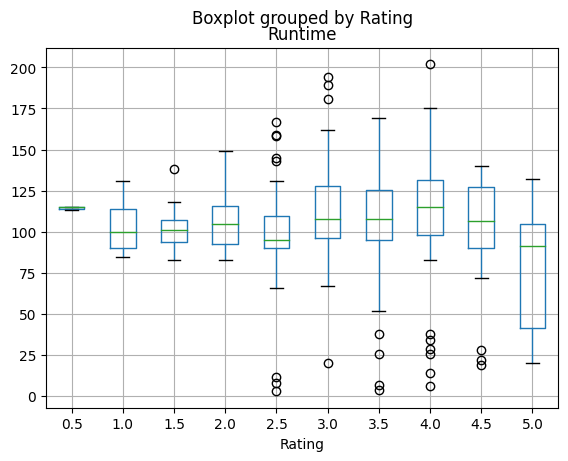

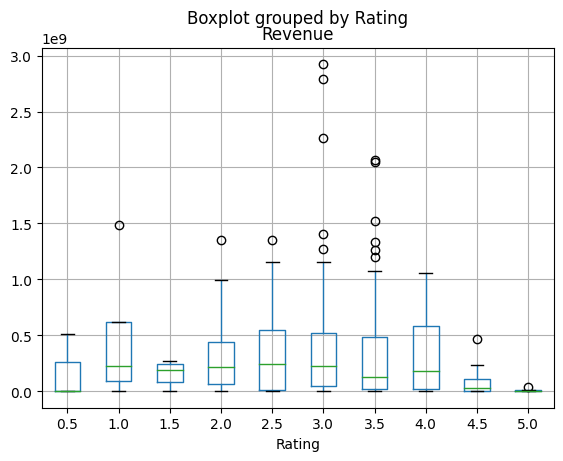

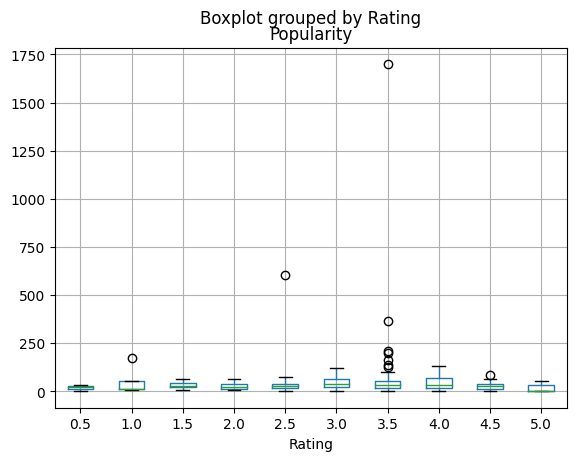

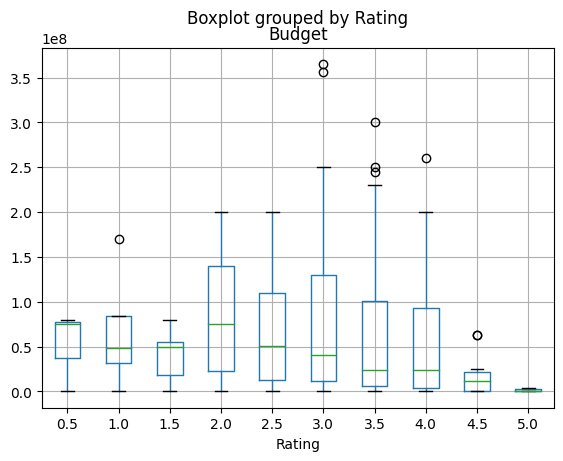

In [22]:
verify_ordinality(processed_data)

In [8]:
print(processed_data[processed_data["Rating"] == 0.5])

     Key        Date                  Name  Year        Letterboxd URI  \
190  190  2021-04-23      Meet the Fockers  2004  https://boxd.it/29NE   
254  254  2022-05-26         Buck Breaking  2021  https://boxd.it/uW9u   
269  269  2022-07-09  The Man from Toronto  2022  https://boxd.it/oRgS   

     Rating                       Genres Runtime    Revenue    Budget  ...  \
190     0.5            [Comedy, Romance]     115  516642939  80000000  ...   
254     0.5                [Documentary]     115          0         0  ...   
269     0.5  [Action, Adventure, Comedy]     113          0  75000000  ...   

    Mystery   NA Romance  Science Fiction  TV Movie  Thriller  War  \
190     0.0  0.0     1.0              0.0       0.0       0.0  0.0   
254     0.0  0.0     0.0              0.0       0.0       0.0  0.0   
269     0.0  0.0     0.0              0.0       0.0       0.0  0.0   

     War & Politics  Western  <NA>  
190             0.0      0.0   NaN  
254             0.0      0.0   NaN 

In [ ]:
top_genres = top_N_genres(processed_data, treshold = 7)
print(top_genres)
top_genres.plot.bar()



In [ ]:
ratings_statistics(processed_data)


In [ ]:
processed_data['Runtime'].isnull().sum()

In [ ]:
print("Number of missing runtime entries is", processed_data["Runtime"].isna().sum())
generate_histogram(processed_data, "Runtime")

In [ ]:
test = data_table[["Rating", "Runtime", "Revenue", "Budget", "Popularity"]]
test = test.dropna()
print(test)

pd.plotting.scatter_matrix(test, figsize=(10,10), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)
plt.show()
sns.pairplot(test, dropna= True)

In [ ]:
data_table["Original Language"].value_counts(dropna=False)
# It seems that non-english values are relatively low
# Consider dropping these entries? Or drop the use of this as an independent variable
# Need to look into methods that can deal with imbalanced classes

In [ ]:
generate_histogram(data_table, "Revenue")

In [ ]:
generate_histogram(data_table, "Budget")

In [ ]:
generate_histogram(data_table, "Popularity")

In [ ]:
print("Number of missing revenue entries is", data_table["Revenue"].isna().sum())
print("Number of missing budget entries is", data_table["Budget"].isna().sum())
print("Number of missing genres entries is", data_table["Genres"].isna().sum())
print("Number of missing popularity entries is", data_table["Popularity"].isna().sum())

# Need to look at problematic entries for each variable, determine overlap
print(pd.merge(data_table["Name"][data_table["Revenue"].isna()], data_table["Name"][data_table["Popularity"].isna()], how='inner'))
print(pd.merge(data_table["Name"][data_table["Genres"].isna()], data_table["Name"][data_table["Popularity"].isna()], how='inner'))


Negative skew on distribution of ratings.
Bimodal distribution on runtime.
Drop Original Language variable.
Drop rows with missing entries in Revenue, Budget, Genres, Popularity


In [ ]:
# Also w.r.t scripts, recent movies will probably not have scripts out
# Also non-english scripts? Maybe subtitles